In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Importing metrics libraries and accuracy metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    BaggingClassifier,
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [6]:
import os
print(os.listdir('/kaggle/input/'))

['sample_submission.csv', 'train.csv', 'test.csv']


In [7]:
train = pd.read_csv('/kaggle/input/train.csv')
test = pd.read_csv('/kaggle/input/test.csv')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

# 2. Exploring train dataset

In [9]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [10]:
train.describe().style.format(precision=2).background_gradient(cmap="Blues")

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.00,140700.00,27897.00,112782.00,27898.00,27897.00,112790.00,140700.00,140696.00,140700.00
mean,70349.50,40.39,3.14,3.00,7.66,2.94,2.97,6.25,2.99,0.18
std,40616.74,12.38,1.38,1.41,1.46,1.36,1.42,3.85,1.41,0.39
min,0.00,18.00,1.00,1.00,5.03,1.00,1.00,0.00,1.00,0.00
25%,35174.75,29.00,2.00,2.00,6.29,2.00,2.00,3.00,2.00,0.00
50%,70349.50,42.00,3.00,3.00,7.77,3.00,3.00,6.00,3.00,0.00
75%,105524.25,51.00,4.00,4.00,8.92,4.00,4.00,10.00,4.00,0.00
max,140699.00,60.00,5.00,5.00,10.00,5.00,5.00,12.00,5.00,1.00


**Summary:**
Dataset has no null values, but there are some columns that are very specific to the Working professional and some those are very specific to the students.

Identify working professional or student using : Working Professional or Student 

Working Professional:

1. Profession
2. Work Pressure
3. Job Satisfaction

Students:
1. Working Professional:
2. Academic Pressure
3. CGPA
4. Study Satisfaction

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'Work Pressure'}>,
        <Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>],
       [<Axes: title={'center': 'Job Satisfaction'}>,
        <Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Financial Stress'}>],
       [<Axes: title={'center': 'Depression'}>, <Axes: >, <Axes: >]],
      dtype=object)

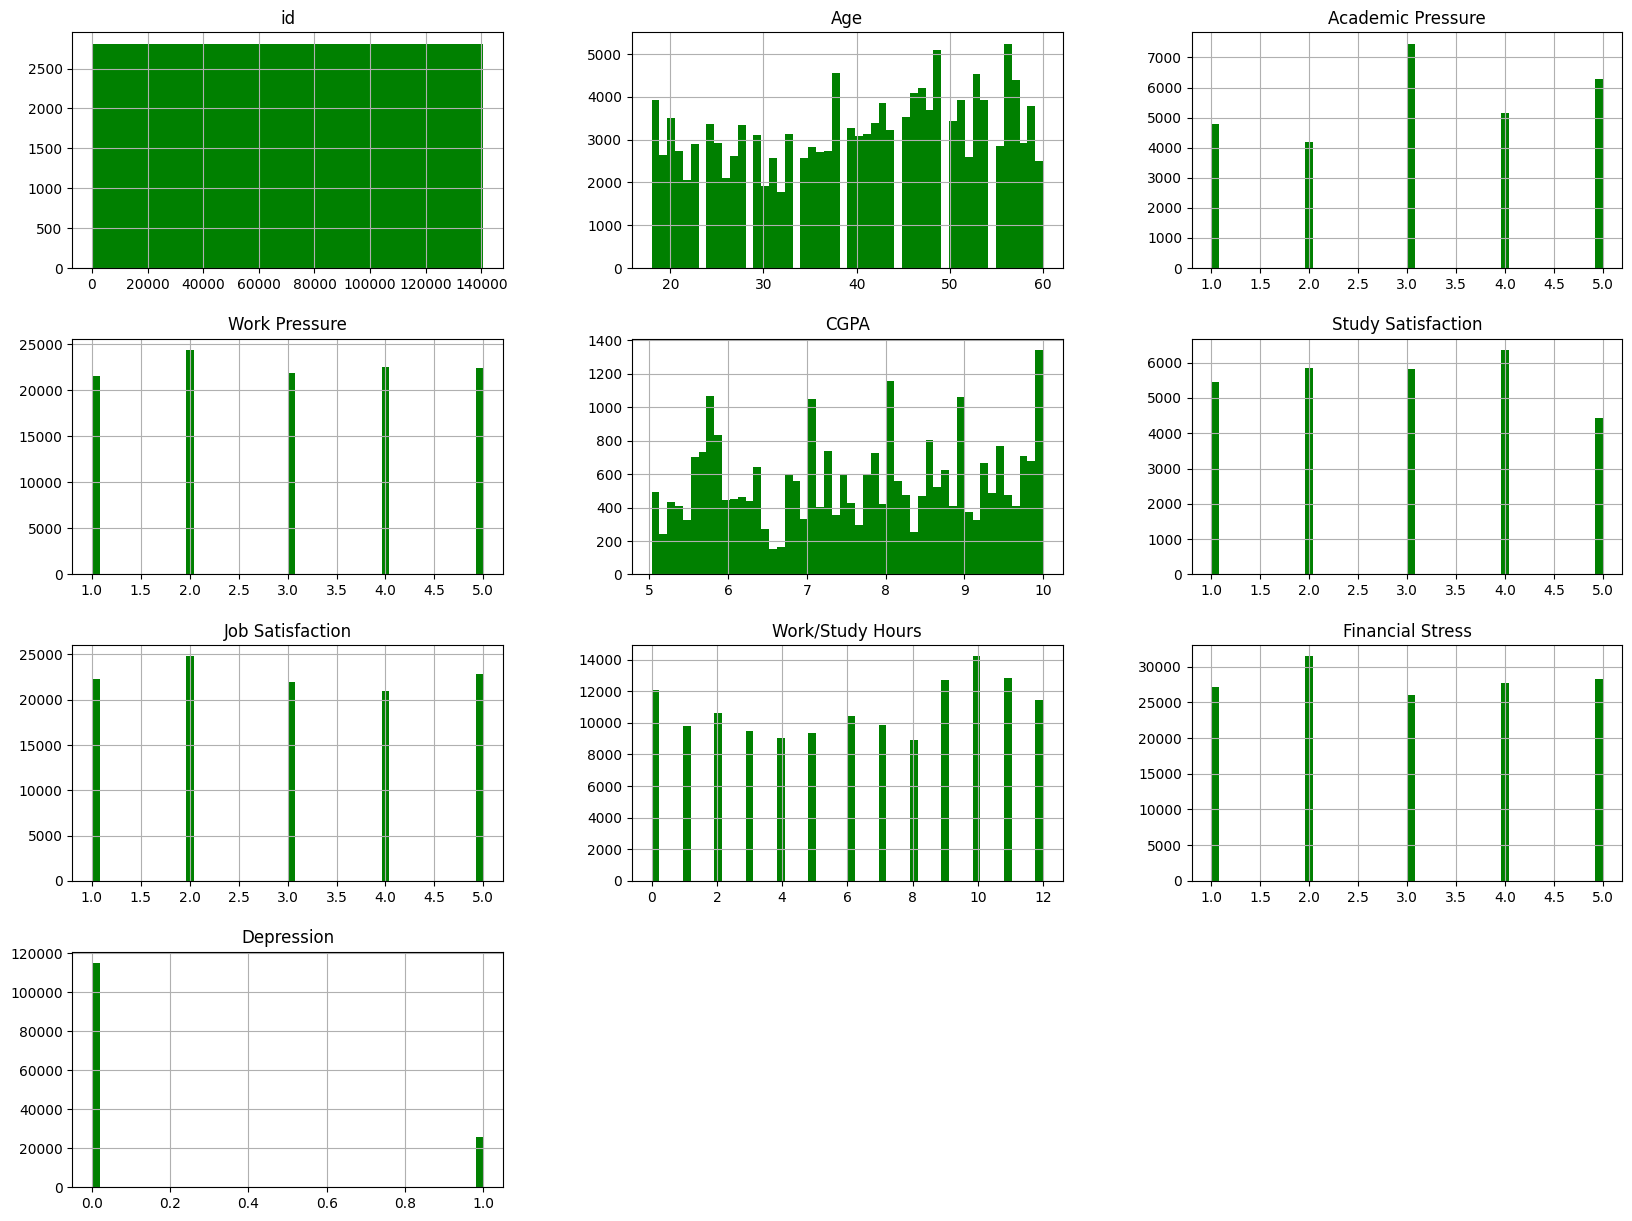

In [11]:
train.hist(bins=50, figsize=(20, 15), color ='green')

# 3. Understanding each variable

In [12]:
#For numerical variables, we can use the describe method to understand the value range and identify outliers.
train.describe()

#There seems to be no outliers, but we can double check Work/Study Hours to check if there any outlier or not

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [13]:
def outlier_check(df):
    '''This will help us to check for the outliers in the numerical columns'''
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Calculate the upper and lower bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Identify outliers
    outliers = df[(df < lower_bound) | (df > upper_bound)]

    # Output message based on the presence of outliers
    if outliers.empty:
        return "There are no outliers."
    else:
        return f"Outliers present: {outliers.values}"


result_tr = outlier_check(train['Work/Study Hours'])
result_test = outlier_check(test['Work/Study Hours'])
print(result_test)


There are no outliers.


*1.Working Professional or Student

In [14]:
train['Working Professional or Student'].value_counts()
test['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    75028
Student                 18772
Name: count, dtype: int64

2. City

In [15]:
# Combine the 'City' column from test and train
temp_1 = pd.concat([test[['City']], train[['City']]], ignore_index=True)
city_counts = temp_1['City'].value_counts()
frequent_cities = city_counts[city_counts > 50].index
print(frequent_cities)

# Mark infrequent cities as 'Others'
train['City'] = train['City'].apply(lambda x: x if x in frequent_cities else 'Others')
test['City'] = test['City'].apply(lambda x: x if x in frequent_cities else 'Others')



Index(['Kalyan', 'Patna', 'Vasai-Virar', 'Kolkata', 'Ahmedabad', 'Meerut',
       'Ludhiana', 'Rajkot', 'Srinagar', 'Visakhapatnam', 'Pune', 'Mumbai',
       'Indore', 'Agra', 'Vadodara', 'Surat', 'Varanasi', 'Hyderabad',
       'Kanpur', 'Jaipur', 'Lucknow', 'Thane', 'Nagpur', 'Bangalore',
       'Chennai', 'Delhi', 'Ghaziabad', 'Bhopal', 'Faridabad', 'Nashik'],
      dtype='object', name='City')


In [16]:
train['Working Professional or Student'] = train['Working Professional or Student'].apply(lambda x: 1 if x == "Working Professional" else 0)
test['Working Professional or Student'] = test['Working Professional or Student'].apply( lambda x: 1 if x == "Working Professional" else 0)


3. Degree

In [17]:
# Combine the 'Degree' column from test and train
temp_2 = pd.concat([test[['Degree']], train[['Degree']]], ignore_index=True)
degree_counts = temp_2['Degree'].value_counts()
frequent_degree = degree_counts[degree_counts > 20].index
print(frequent_degree)

Index(['Class 12', 'B.Ed', 'B.Arch', 'B.Com', 'B.Pharm', 'BCA', 'M.Ed', 'MCA',
       'BBA', 'BSc', 'MSc', 'LLM', 'M.Pharm', 'M.Tech', 'B.Tech', 'LLB', 'BHM',
       'MBA', 'BA', 'ME', 'MD', 'MHM', 'BE', 'M.Com', 'PhD', 'MBBS', 'MA'],
      dtype='object', name='Degree')


In [18]:
# Mark infrequent cities as 'Others'
train['Degree'] = train['Degree'].apply(lambda x: x if x in frequent_degree else 'Others')
test['Degree'] = test['Degree'].apply(lambda x: x if x in frequent_degree else 'Others')

4. Profession 

In [19]:
# Fill 'Profession' with 'Student' where 'Working Professional or Student' is 0 and 'Profession' is NaN
train.loc[(train['Working Professional or Student'] == 0) & (train['Profession'].isna()), 'Profession'] = 'Student'
test.loc[(test['Working Professional or Student'] == 0) & (test['Profession'].isna()), 'Profession'] = 'Student'

In [20]:
# Step 1: Create a mapping of Degree -> most common Profession, where there are multiple profession, we have taken degree with highest number of profession
degree_profession_mapping = (
    train[train['Working Professional or Student'] == 1]
    .groupby('Degree')['Profession']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .to_dict()
)

In [21]:
print(degree_profession_mapping)

{'B.Arch': 'Teacher', 'B.Com': 'Accountant', 'B.Ed': 'Teacher', 'B.Pharm': 'Teacher', 'B.Tech': 'Data Scientist', 'BA': 'Customer Support', 'BBA': 'HR Manager', 'BCA': 'Data Scientist', 'BE': 'Pilot', 'BHM': 'Chef', 'BSc': 'Teacher', 'Class 12': 'Teacher', 'LLB': 'Teacher', 'LLM': 'Teacher', 'M.Com': 'Customer Support', 'M.Ed': 'Content Writer', 'M.Pharm': 'Chemist', 'M.Tech': 'UX/UI Designer', 'MA': 'Teacher', 'MBA': 'Teacher', 'MBBS': 'Pharmacist', 'MCA': 'Consultant', 'MD': 'Pharmacist', 'ME': 'Content Writer', 'MHM': 'Chef', 'MSc': 'Entrepreneur', 'Others': 'Teacher', 'PhD': 'Plumber'}


In [22]:
# Step 2: Update missing Profession values based on Degree
train.loc[(train['Working Professional or Student'] == 1) & (train['Profession'].isna()), 'Profession'] = train.loc[ (train['Working Professional or Student'] == 1) & (train['Profession'].isna()),
    'Degree'].map(degree_profession_mapping)

test.loc[(test['Working Professional or Student'] == 1) & (test['Profession'].isna()), 'Profession'] = test.loc[(test['Working Professional or Student'] == 1) & (test['Profession'].isna()), 
    'Degree'
].map(degree_profession_mapping)

In [23]:
# Step 3: Combine 'Profession' columns from train and test datasets
temp_2 = pd.concat([test[['Profession']], train[['Profession']]], ignore_index=True)
profession_counts = temp_2['Profession'].value_counts()
frequent_professions = profession_counts[profession_counts > 20].index
print(frequent_professions)


Index(['Teacher', 'Student', 'Content Writer', 'Architect', 'Consultant',
       'HR Manager', 'Pharmacist', 'Doctor', 'Business Analyst', 'Chemist',
       'Entrepreneur', 'Chef', 'Educational Consultant', 'Data Scientist',
       'Researcher', 'Lawyer', 'Customer Support', 'Pilot',
       'Marketing Manager', 'Travel Consultant', 'Judge', 'Manager', 'Plumber',
       'Sales Executive', 'Electrician', 'Financial Analyst',
       'Software Engineer', 'Civil Engineer', 'UX/UI Designer',
       'Digital Marketer', 'Finanancial Analyst', 'Accountant',
       'Mechanical Engineer', 'Graphic Designer', 'Research Analyst',
       'Investment Banker'],
      dtype='object', name='Profession')


In [24]:
# Mark infrequent Profession as 'Others'
train['Profession'] = train['Profession'].apply(lambda x: x if x in frequent_professions else 'Others')
test['Profession'] = test['Profession'].apply(lambda x: x if x in frequent_professions else 'Others')

In [25]:
#Creating one more Categories
# Create a dictionary to map professions to categories
profession_to_category = {
    'Teacher': 'Education',
    'Student': 'Education',
    'Content Writer': 'Education',
    'Architect': 'Engineering',
    'Consultant': 'Consulting & Management',
    'HR Manager': 'Consulting & Management',
    'Pharmacist': 'Healthcare',
    'Doctor': 'Healthcare',
    'Business Analyst': 'Finance & Accounting',
    'Chemist': 'Science & Research',
    'Entrepreneur': 'Consulting & Management',
    'Chef': 'Skilled Trades & Labor',
    'Educational Consultant': 'Education',
    'Data Scientist': 'Science & Research',
    'Researcher': 'Science & Research',
    'Lawyer': 'Law & Governance',
    'Customer Support': 'Consulting & Management',
    'Pilot': 'Law & Governance',
    'Marketing Manager': 'Consulting & Management',
    'Travel Consultant': 'Consulting & Management',
    'Judge': 'Law & Governance',
    'Manager': 'Consulting & Management',
    'Sales Executive': 'Consulting & Management',
    'Plumber': 'Skilled Trades & Labor',
    'Electrician': 'Skilled Trades & Labor',
    'Financial Analyst': 'Finance & Accounting',
    'Software Engineer': 'Engineering',
    'Civil Engineer': 'Engineering',
    'UX/UI Designer': 'Engineering',
    'Digital Marketer': 'Consulting & Management',
    'Financial Analyst': 'Finance & Accounting',
    'Accountant': 'Finance & Accounting',
    'Mechanical Engineer': 'Engineering',
    'Graphic Designer': 'Creative & Design',
    'Research Analyst': 'Consulting & Management',
    'Investment Banker': 'Finance & Accounting'
}

# Map the profession column to categories
train['Profession Category'] = train['Profession'].map(profession_to_category)
test['Profession Category'] = test['Profession'].map(profession_to_category)

# Check the result
print(train[['Profession', 'Profession Category']].head())


         Profession     Profession Category
0              Chef  Skilled Trades & Labor
1           Teacher               Education
2           Student               Education
3           Teacher               Education
4  Business Analyst    Finance & Accounting


4. Work/Academic pressure

In [26]:
#We will combine the work and academic pressue into one column, apart from Financial pressume this is one of the most important factor

#Understanding if there is any value where both are Work and Academic pressure are applicable
# Filter rows where both 'Work Pressure' and 'Academic Pressure' are non-NaN
temp_p = train[(train['Work Pressure'].notna()) & (train['Academic Pressure'].notna())]

# Print the values, no such pressure exist
print(temp_p)

# Function to combine 'Work Pressure' and 'Academic Pressure' into one 'Pressure' column
def combine_pressure(data):
    # Create a new 'Pressure' column and initialize it as None
    data['Pressure'] = None
    for index, row in data.iterrows():
        if pd.notna(row['Work Pressure']): 
            data.at[index, 'Pressure'] = row['Work Pressure']
        elif pd.notna(row['Academic Pressure']):
            data.at[index, 'Pressure'] = row['Academic Pressure']
    data['Pressure'] = data['Pressure'].fillna(data['Pressure'].mean())

    return data



Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, Profession Category]
Index: []

[0 rows x 21 columns]


In [27]:
train = combine_pressure(train)
test = combine_pressure(test)
print(train[['Work Pressure', 'Academic Pressure', 'Pressure']].head())
print(test[['Work Pressure', 'Academic Pressure', 'Pressure']].head())

/tmp/ipykernel_63/1455698354.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Pressure'] = data['Pressure'].fillna(data['Pressure'].mean())


   Work Pressure  Academic Pressure  Pressure
0            5.0                NaN       5.0
1            4.0                NaN       4.0
2            NaN                5.0       5.0
3            5.0                NaN       5.0
4            1.0                NaN       1.0
   Work Pressure  Academic Pressure  Pressure
0            2.0                NaN       2.0
1            2.0                NaN       2.0
2            4.0                NaN       4.0
3            NaN                5.0       5.0
4            5.0                NaN       5.0


/tmp/ipykernel_63/1455698354.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Pressure'] = data['Pressure'].fillna(data['Pressure'].mean())


In [28]:
train['Working Professional or Student'].value_counts()

Working Professional or Student
1    112799
0     27901
Name: count, dtype: int64

In [29]:
def fill_missing_cgpa(data):
    # Calculate median CGPA for each group
    median_cgpa = data.groupby('Working Professional or Student')['CGPA'].median()
    
    # Fill missing CGPA values based on group median
    data['CGPA'] = data.apply(
        lambda row: median_cgpa[row['Working Professional or Student']] if pd.isna(row['CGPA']) else row['CGPA'], 
        axis=1
    )
    return data

# Apply the function to both train and test datasets
train = fill_missing_cgpa(train)
test = fill_missing_cgpa(test)


In [30]:
# Filter rows where both 'Study Satisfaction' and 'Job Satisfaction' are not null
temp_s = train[(train['Study Satisfaction'].notna()) & (train['Job Satisfaction'].notna())]

# Print the count of rows
print("Count of rows where both 'Study Satisfaction' and 'Job Satisfaction' are not null:")
print(temp_s.shape[0])


Count of rows where both 'Study Satisfaction' and 'Job Satisfaction' are not null:
2


In [31]:
#Creating a single function for both train and test
def combine_satisfaction(data):
    data['Satisfaction'] = None
    for index, row in data.iterrows():
        if pd.notna(row['Job Satisfaction']): 
            data.at[index, 'Satisfaction'] = row['Job Satisfaction']
        elif pd.notna(row['Study Satisfaction']):  
            data.at[index, 'Satisfaction'] = row['Study Satisfaction']
    data['Satisfaction'] = data['Satisfaction'].fillna(data['Satisfaction'].mean())
    return data

In [32]:
train = combine_satisfaction(train)
test = combine_satisfaction(test)
print(train[['Job Satisfaction', 'Study Satisfaction', 'Satisfaction']].head())

/tmp/ipykernel_63/2460119255.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Satisfaction'] = data['Satisfaction'].fillna(data['Satisfaction'].mean())


   Job Satisfaction  Study Satisfaction  Satisfaction
0               2.0                 NaN           2.0
1               3.0                 NaN           3.0
2               NaN                 2.0           2.0
3               1.0                 NaN           1.0
4               1.0                 NaN           1.0


/tmp/ipykernel_63/2460119255.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Satisfaction'] = data['Satisfaction'].fillna(data['Satisfaction'].mean())


In [33]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [34]:
def Sleep_func(df, column_name):
    df['Sleep_Duration_bucket'] = None
    
    for index, value in df[column_name].items():
        if value == 'Less than 5 hours':
            df.loc[index, 'Sleep_Duration_bucket'] = 1
        elif value == '5-6 hours':
            df.loc[index, 'Sleep_Duration_bucket'] = 2
        elif value == '7-8 hours':
            df.loc[index, 'Sleep_Duration_bucket'] = 3
        elif value == 'More than 8 hours':
            df.loc[index, 'Sleep_Duration_bucket'] = 4

    df.dropna(subset=['Sleep_Duration_bucket'], inplace=True)

    return df


In [35]:
Sleep_func(test,"Sleep Duration");
Sleep_func(train,"Sleep Duration");

In [36]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49670
Unhealthy            46201
Healthy              44723
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [37]:
def Dietary_Habits_func(df, column_name):
    df['Dietary_Habits_bucket'] = None
    
    for index, value in df[column_name].items():
        if value == 'Unhealthy':
            df.loc[index, 'Dietary_Habits_bucket'] = 1
        elif value == 'Moderate':
            df.loc[index, 'Dietary_Habits_bucket'] = 2
        elif value == 'Healthy':
            df.loc[index, 'Dietary_Habits_bucket'] = 3

    df.dropna(subset=['Dietary_Habits_bucket'], inplace=True)

    return df


In [38]:
Dietary_Habits_func(train, 'Dietary Habits');
Dietary_Habits_func(test, 'Dietary Habits');

In [39]:
def suicidal_thoughts_encoding(df, column_name):
    df['Suicidal_thoughts'] = None
    
    for index, value in df[column_name].items():
        if value == 'Yes':
            df.loc[index, 'Suicidal_thoughts'] = 0
        elif value == 'No':
            df.loc[index, 'Suicidal_thoughts'] = 1

    return df


In [40]:
suicidal_thoughts_encoding(train, 'Have you ever had suicidal thoughts ?');
suicidal_thoughts_encoding(test, 'Have you ever had suicidal thoughts ?');


In [41]:
def family_history_encoding(df, column_name):
    df['Family_history'] = None
    
    for index, value in df[column_name].items():
        if value == 'Yes':
            df.loc[index, 'Family_history'] = 0
        elif value == 'No':
            df.loc[index, 'Family_history'] = 1

    return df


In [42]:
family_history_encoding(train, 'Family History of Mental Illness');
family_history_encoding(test, 'Family History of Mental Illness');

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140594 entries, 0 to 140699
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140594 non-null  int64  
 1   Name                                   140594 non-null  object 
 2   Gender                                 140594 non-null  object 
 3   Age                                    140594 non-null  float64
 4   City                                   140594 non-null  object 
 5   Working Professional or Student        140594 non-null  int64  
 6   Profession                             140594 non-null  object 
 7   Academic Pressure                      27867 non-null   float64
 8   Work Pressure                          112706 non-null  float64
 9   CGPA                                   140594 non-null  float64
 10  Study Satisfaction                     27867 non-null   float

In [44]:
train['Financial Stress'] = train['Financial Stress'].fillna(0)

# Relationship between variables

In [45]:
profession = train.groupby(['Working Professional or Student', 'Age']).agg(Number_of_people=('id', 'count')).reset_index()
profession = profession.sort_values(by='Age', ascending=True)

wp = profession[profession['Working Professional or Student'] == "1"]
student = profession[profession['Working Professional or Student'] == "0"]


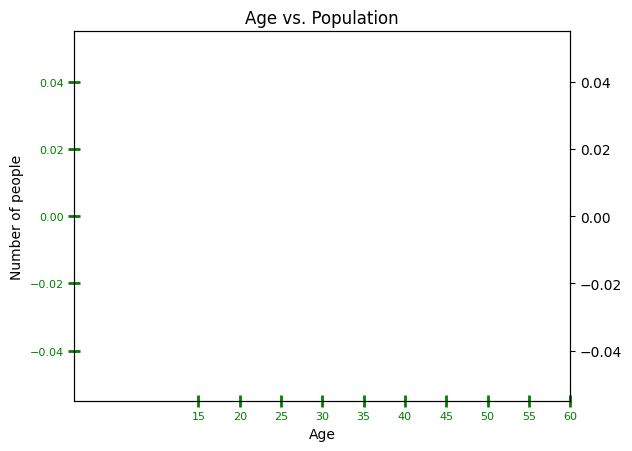

In [46]:
fig, ax = plt.subplots()

#Student
ax.plot(student['Age'], student['Number_of_people'], color ='g', linestyle="--", marker ="o")

#Working professional
ax2 = ax.twinx()
ax2.plot(wp['Age'], wp['Number_of_people'], color ='r', linestyle="-", marker ="")

#Creating labels
ax.set_title("Age vs. Population")
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")

# Adjust tick intervals for x-axis
ax.set_xticks(range(15, 65, 5)) 

# Customize tick parameters for x-axis and y-axis
ax.tick_params(axis='x', colors='green', length=8, width=2, direction='inout', labelsize=8)
ax.tick_params(axis='y', colors='green', length=8, width=2, direction='inout', labelsize=8)  

plt.show()


In [47]:
age_dep = train.groupby('Age')['Depression'].agg(Count='count', Sum='sum').reset_index()
age_dep.columns = ['Age','Pop','Dep_pop']
age_dep['Dep %'] = round((age_dep['Dep_pop'] / age_dep['Pop']) * 100,1)
age_dep.head()


,Age,Pop,Dep_pop,Dep %
0,18.0,3919,2780,70.9
1,19.0,2634,1665,63.2
2,20.0,3514,2184,62.2
3,21.0,2741,1841,67.2
4,22.0,2065,1087,52.6


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


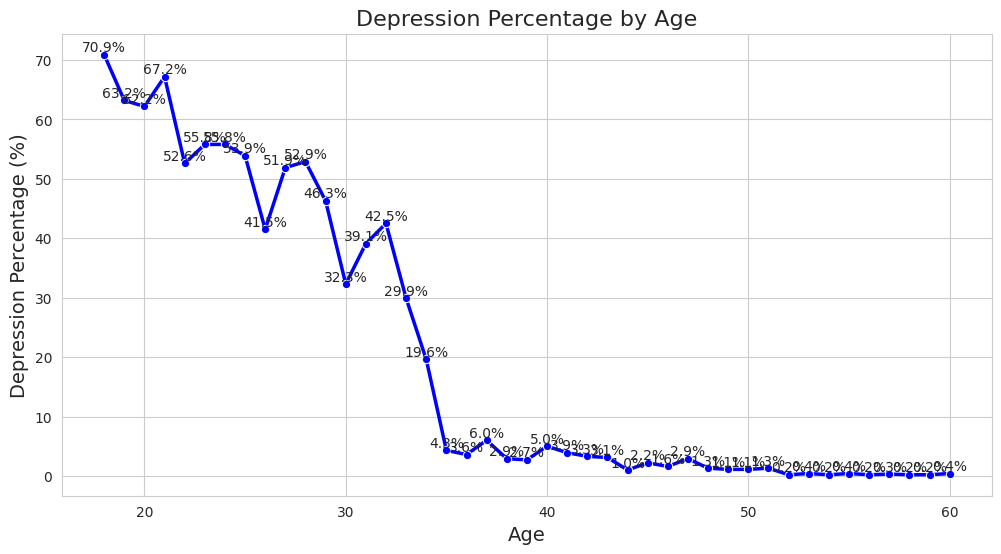

In [48]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

line_plot = sns.lineplot(
    x='Age',
    y='Dep %',
    data=age_dep,
    marker='o',
    color='blue',
    linewidth=2.5
)

# Setting title and labels
line_plot.set_title("Depression Percentage by Age", fontsize=16)
line_plot.set_xlabel("Age", fontsize=14)
line_plot.set_ylabel("Depression Percentage (%)", fontsize=14)

#Add grid lines
plt.grid(visible=True)

# Annotate points with their values
for i, row in age_dep.iterrows():
    plt.text(
        row['Age'], 
        row['Dep %'], 
        f"{row['Dep %']:.1f}%", 
        fontsize=10,
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.show()


In [49]:
city_dep = train.groupby('City')['Depression'].agg(Count='count', Sum='sum').reset_index()
city_dep.columns = ['City','Population','Dep_population']
city_dep = city_dep[city_dep['Population'] > 50]
city_dep['Depressed %'] = city_dep['Dep_population']/city_dep['Population']

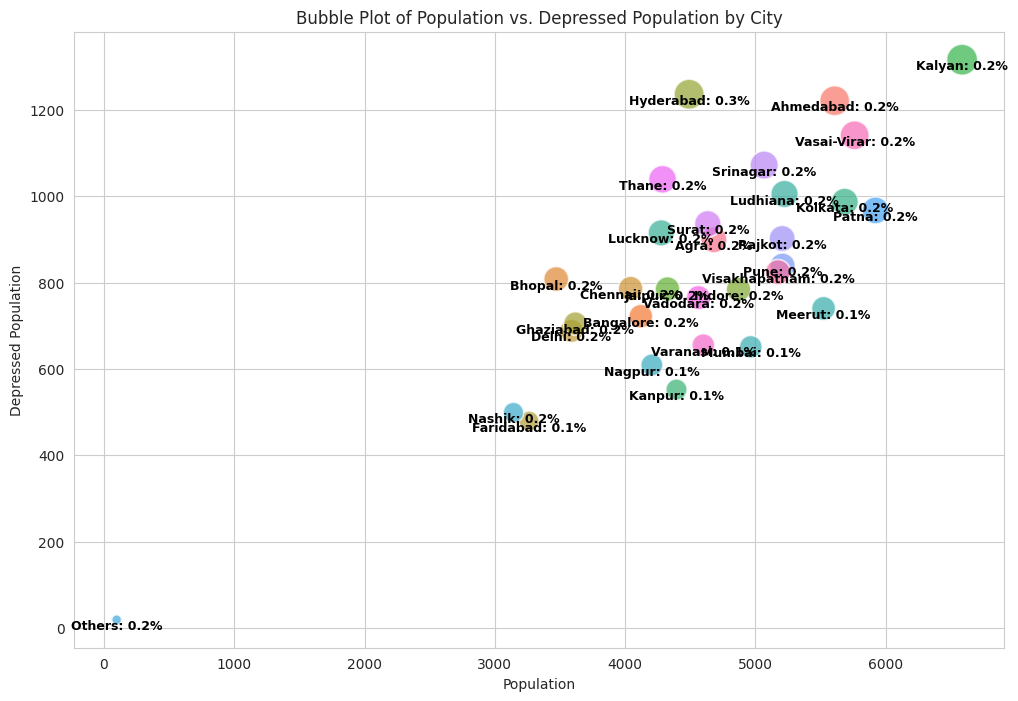

In [50]:
# Creating a color palette based on the unique cities
unique_cities = city_dep['City'].unique()
palette = sns.color_palette("husl", len(unique_cities))

# Map colors to cities
color_map = {city: palette[i] for i, city in enumerate(unique_cities)}

#Creating a scatter plot
plt.figure(figsize=(12, 8)) 
scatter = sns.scatterplot(
    x='Population',
    y='Dep_population',
    data=city_dep,
    size='Dep_population',
    sizes=(50, 500),
    alpha=0.7,
    legend=False,
    hue='City',
    palette=color_map
)

# Annotate the bubbles with the city names and "Depressed %" values
for i in range(city_dep.shape[0]):
    plt.text(
        city_dep['Population'].iloc[i],
        city_dep['Dep_population'].iloc[i],
        f"{city_dep['City'].iloc[i]}: {city_dep['Depressed %'].iloc[i]:.1f}%",  # Include city name
        horizontalalignment='center',
        verticalalignment='top',
        fontsize=9,
        color='black', 
        weight='bold'
    )

# Set the title and labels
plt.title('Bubble Plot of Population vs. Depressed Population by City')
plt.xlabel('Population')
plt.ylabel('Depressed Population')

# Show the plot
plt.show()


In [51]:
# Count the number of columns in the 'train' DataFrame
column_count = train.columns.size
print("Number of columns in the 'train' DataFrame:", column_count)

Number of columns in the 'train' DataFrame: 27


In [52]:
# Count the number of columns in the 'train' DataFrame. Target variables needs to be separated out in the train
column_count = test.columns.size
print("Number of columns in the 'train' DataFrame:", column_count)

Number of columns in the 'train' DataFrame: 26


In [53]:
# Drop unnecessary columns from train_f
train_f = train.drop(columns=[
    'id', 'Name', 'Study Satisfaction', 'Job Satisfaction', 'Academic Pressure', 
    'Work Pressure', 'Sleep Duration', 
    'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness', 'Depression','Profession Category'
])

# Drop unnecessary columns from test_f
test_f = test.drop(columns=[
    'id', 'Name', 'Study Satisfaction', 'Job Satisfaction', 'Academic Pressure', 
    'Work Pressure', 'Sleep Duration', 
    'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness','Profession Category'
])


In [54]:
train_f = pd.DataFrame(train_f)
train_f.isna().sum().sort_values(ascending = False)

Gender                             0
Age                                0
City                               0
Working Professional or Student    0
Profession                         0
CGPA                               0
Degree                             0
Work/Study Hours                   0
Financial Stress                   0
Pressure                           0
Satisfaction                       0
Sleep_Duration_bucket              0
Dietary_Habits_bucket              0
Suicidal_thoughts                  0
Family_history                     0
dtype: int64

In [55]:
# Count the number of columns in the 'train' DataFrame. Target variables needs to be separated out in the train
column_count = train_f.columns.size
print("Number of columns in the 'train' DataFrame:", column_count)

Number of columns in the 'train' DataFrame: 15


In [56]:
train_y = train[['Depression']].values.ravel()

In [57]:
#Doing hot encoding

def encode_and_concatenate(df, columns_to_encode):
    encoded_df = pd.get_dummies(df[columns_to_encode]).astype(int)
    df = pd.concat([df, encoded_df], axis=1)
    df = df.drop(columns=columns_to_encode)
    return df

In [58]:
# Columns to encode
columns_to_encode = ['Gender', 'City', 'Profession', 'Degree']

# Applying the function to both train and test data
train_f = encode_and_concatenate(train_f, columns_to_encode)
test_f = encode_and_concatenate(test_f, columns_to_encode)

In [59]:
# Convert specified columns to integer type
train_f['Sleep_Duration_bucket'] = train_f['Sleep_Duration_bucket'].astype(int)
train_f['Dietary_Habits_bucket'] = train_f['Dietary_Habits_bucket'].astype(int)
train_f['Suicidal_thoughts'] = train_f['Suicidal_thoughts'].astype(int)
train_f['Family_history'] = train_f['Family_history'].astype(int)


# Convert specified columns to integer type
test_f['Sleep_Duration_bucket'] = test_f['Sleep_Duration_bucket'].astype(int)
test_f['Dietary_Habits_bucket'] = test_f['Dietary_Habits_bucket'].astype(int)
test_f['Suicidal_thoughts'] = test_f['Suicidal_thoughts'].astype(int)
test_f['Family_history'] = test_f['Family_history'].astype(int)

TESTING****

In [60]:
# Assuming train_f is your DataFrame
# Get the description
desc = train_f.describe()

# Add a row for unique value counts
unique_counts = pd.DataFrame(train_f.nunique()).T  # Get unique counts and transpose
unique_counts.index = ['Unique Values']  # Rename the index for clarity

# Concatenate the description with unique counts
combined = pd.concat([desc, unique_counts], ignore_index=False)

# Apply new styling
styled_combined = combined.style.set_properties(**{
    "background-color": "#f3f4f6",  # Light gray for a soft look
    "color": "#333333",              # Darker grey for better readability
    "border": "2px solid #1e88e5",   # A deeper blue border
    "font-weight": "bold"            # Optional: makes the text bolder
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#1976d2"), ("color", "white"), ("font-weight", "bold")]}  # Header styles in a darker blue
]).format(precision=2)  # Format all values to show 2 decimal places

# Display the styled DataFrame
styled_combined


,Age,Working Professional or Student,CGPA,Work/Study Hours,Financial Stress,Pressure,Satisfaction,Sleep_Duration_bucket,Dietary_Habits_bucket,Suicidal_thoughts,Family_history,Gender_Female,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Kolkata,City_Lucknow,City_Ludhiana,City_Meerut,City_Mumbai,City_Nagpur,City_Nashik,City_Others,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Profession_Accountant,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Finanancial Analyst,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Others,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Student,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
count,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00,140594.00
mean,40.39,0.80,8.03,6.25,2.99,3.03,2.97,2.45,1.99,0.51,0.50,0.45,0.55,0.03,0.04,0.03,0.02,0.03,0.03,0.02,0.03,0.03,0.03,0.03,0.05,0.03,0.04,0.03,0.04,0.04,0.04,0.03,0.02,0.00,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.04,0.04,0.01,0.03,0.02,0.02,0.02,0.01,0.03,0.06,0.01,0.02,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.03,0.00,0.01,0.02,0.01,0.01,0.01,0.00,0.03,0.01,0.01,0.00,0.02,0.01,0.01,0.20,0.24,0.01,0.01,0.06,0.06,0.08,0.04,0.03,0.03,0.04,0.04,0.02,0.03,0.04,0.10,0.03,0.03,0.02,0.04,0.03,0.03,0.02,0.03,0.02,0.04,0.02,0.03,0.02,0.03,0.00,0.02
std,12.38,0.40,0.68,3.85,1.41,1.40,1.41,1.12,0.80,0.50,0.50,0.50,0.50,0.18,0.20,0.17,0.16,0.17,0.16,0.15,0.16,0.18,0.18,0.17,0.21,0.17,0.20,0.17,0.19,0.19,0.18,0.17,0.15,0.03,0.20,0.19,0.19,0.19,0.18,0.17,0.18,0.18,0.20,0.19,0.10,0.17,0.15,0.14,0.14,0.10,0.17,0.23,0.12,0.13,0.10,0.15,0.14,0.11,0.14,0.10,0.11,0.09,0.17,0.05,0.11,0.12,0.11,0.12,0.09,0.02,0.16,0.12,0.11,0.07,0.13,0.11,0.10,0.40,0.43,0.11,0.10,0.24,0.23,0.28,0.20,0.17,0.16,0.19,0.20,0.15,0.17,0.19,0.31,0.17,0.18,0.15,0.20,0.18,0.18,0.14,0.16,0.15,0.19,0.15,0

In [61]:
#Converting Standard_Scaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_f)
x_scaled_df = pd.DataFrame(scaled_data, columns=train_f.columns)
scaled_test_data = scaler.transform(test_f)
x_scaled_test_df = pd.DataFrame(scaled_test_data, columns=test_f.columns)

# Let's start modeling

In [62]:
#Importing classification model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [63]:
#Import metrics libraries and accuracy metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
models = {
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'xg': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'lgm': LogisticRegression(random_state=42),
    'catboost': CatBoostClassifier(verbose=0, random_state=42),
    'lgbm': LGBMClassifier(random_state=42, force_col_wise=True),  # Add force_col_wise=True
    'et': ExtraTreesClassifier(random_state=42),
    'ada': AdaBoostClassifier(random_state=42),
    'mlp': MLPClassifier(random_state=42),
    'hgb': HistGradientBoostingClassifier(random_state=42),
}

In [66]:
#Splitting data to train and test split
X_train,X_test,y_train,y_test = train_test_split(x_scaled_df,train_y,test_size = 0.2, random_state = 42)

In [ ]:
accuracy = []
model_predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    test_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"1. {name} Test Set Accuracy: {test_score:.2f}")
    print("2. Confusion Matrix:\n", cm)
    
    # Print Classification Report
    print("3. Classification Report:\n", classification_report(y_test, y_pred))
    
    accuracy.append((name, test_score))

    # predict_values = model.predict(test_f)
    # model_preds = pd.DataFrame({'Predictions': predict_values})
    # model_predictions[name] = model_preds


In [67]:
# Create tuples of model name and instance
estimators = [(name, model) for name, model in models.items()]

# Create the Voting Classifier (use 'soft' voting for probabilities or 'hard' for majority rule)
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

# # Optional: Save the Voting Classifier if required
# import joblib
# joblib.dump(voting_clf, "/kaggle/working/voting_clf_model.pkl")
# print("Voting Classifier model saved to /kaggle/working/voting_clf_model.pkl")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20504, number of negative: 91971
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 112475, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182298 -> initscore=-1.500853
[LightGBM] [Info] Start training from score -1.500853


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Classifier Accuracy: 0.94


In [68]:
y_voting_result = voting_clf.predict(x_scaled_test_df)

In [69]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23077
           1       0.85      0.81      0.83      5042

    accuracy                           0.94     28119
   macro avg       0.90      0.89      0.90     28119
weighted avg       0.94      0.94      0.94     28119



In [71]:
Sub_29_11_v4 = pd.DataFrame()
Sub_29_11_v4['id'] = test['id']  # Add 'id' column from the 'test' DataFrame
Sub_29_11_v4['Predictions'] = y_voting_result  # Add predictions as a new column


# Save the DataFrame as needed (e.g., as CSV or Excel)
Sub_29_11_v4.to_csv("/kaggle/working/Sub_29_11_v4.csv", index=False)

#Trying RandomForestClassifier

In [ ]:
best_rf_model_v1 = RandomForestClassifier(random_state=21)
best_rf_model_v1.fit(X_train, y_train)
y_competition = best_rf_model_v1.predict(x_scaled_test_df)
predictions_df = pd.DataFrame(y_competition, columns=["Predictions"])

In [ ]:
importances = best_rf_model_v1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

In [ ]:
Sub_29_11_v1 = pd.DataFrame()
Sub_29_11_v1['id'] = test['id']  # Add 'id' column from the 'test' DataFrame
Sub_29_11_v1['Predictions'] = y_competition  # Add predictions as a new column


# Save the DataFrame as needed (e.g., as CSV or Excel)
Sub_29_11_v1.to_csv("/kaggle/working/Sub_29_11_v1.csv", index=False)

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split an internal node
    "min_samples_leaf": [1, 2, 4],    # Minimum samples at a leaf node
    "max_features": ["sqrt", "log2", None],  # Number of features to consider for splits
    "bootstrap": [True, False],       # Whether to use bootstrap sampling
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring="accuracy",  # Use appropriate scoring metric
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    bootstrap=best_params["bootstrap"],
    random_state=42,
)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# accuracy = []
# model_predictions = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy and confusion matrix
#     test_score = accuracy_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
    
#     print("1. {model} Test Set Accuracy: {:.2f}".format(name, test_score))
#     print("2. Confusion Matrix:\n", cm)
    
#     # Print Classification Report
#     print("3. Classification Report:\n", classification_report(y_test, y_pred))
    
#     accuracy.append((name, test_score))

#     predict_values = model.predict(test_f)
#     model_preds = pd.DataFrame({'Predictions': predict_values})
#     model_predictions[name] = model_preds

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import joblib  # Import joblib for saving the model

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 100, 500)  # Number of trees
    max_depth = trial.suggest_int("max_depth", 5, 50, log=True)  # Maximum depth of trees
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)  # Min samples to split a node
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)  # Min samples at a leaf node
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])  # Features to consider
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Bootstrap sampling
    
    # Create the model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
    )
    
    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    return scores.mean()

# Create an Optuna study
study = optuna.create_study(direction="maximize")

# Optimize the study
study.optimize(objective, n_trials=10, n_jobs=-1)  # Adjust n_trials for thoroughness

# Retrieve the best hyperparameters
best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    bootstrap=best_params["bootstrap"],
    random_state=42,
)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the trained model
file_path = "/kaggle/working/best_rf_model.pkl"  # Specify the file path
joblib.dump(best_rf_model, file_path)  # Save the model
print(f"Model saved to {file_path}")


In [ ]:
# Make predictions on the test data
y_competition = best_rf_model.predict(test_f)  # Predict using the test features

# Create a DataFrame to store the predictions
Sub_29_11_v2 = pd.DataFrame()  # Updated DataFrame name
Sub_29_11_v2['id'] = test['id']  # Add 'id' column from the 'test' DataFrame
Sub_29_11_v2['Predictions'] = y_competition  # Add predictions as a new column

# Save the DataFrame as needed (e.g., as CSV)
Sub_29_11_v2.to_csv("/kaggle/working/Sub_29_11_v2.csv", index=False)  # Updated file name
print(f"Predictions saved to /kaggle/working/Sub_29_11_v2.csv")
